**Оглавление:**
1. [Изучение данных](#step1)  
2. [Предобработка данных](#step2) 
3. [Функции для расчета и анализа LTV, ROI, удержания и конверсии](#step3)
4. [Исследовательский анализ данных](#step4)
5. [Маркетинг](#step5)
6. [Oкупаемость рекламы для привлечения пользователей](#step6)
7. [Общий вывод](#step7)

<a id="step1"></a>
## Изучение данных 

Для начала имортируем необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timedelta

Рассмотрим по отдельности каждую таблицу:

In [2]:
visits = pd.read_csv('datasets/visits_info_short.csv')
orders = pd.read_csv('datasets/orders_info_short.csv')
costs = pd.read_csv('datasets/costs_info_short.csv')

Напишем функцию, которая поможет нам подробнее рассмотреть каждую таблицу:

In [3]:
def description(dataset):
    display(dataset.head())
    display(dataset.info())

### Таблица visits_log_short (лог сервера с информацией о посещениях сайта)

In [4]:
description(visits)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Таблица состоит из 309901 строк и 6 столбцов.

Видим, что в таблице отсутствуют пропущенные значения. В таблице имеются столбцы типа int и object. Столбцы `Session Start` и `Session End` имеют тип object, для дальнейшего исследование необходимо будет изменить формат на datetime.

### Таблица orders_log_short (информация о заказах)

In [5]:
description(orders)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Таблица состоит из 40212 строк и 3 столбцов.

Видим, что в таблице отсутствуют пропущенные значения. В таблице имеются столбцы типа int, float, object. Столбец `Event Dt` имеет тип object, для дальнейшего исследование необходимо будет изменить формат на datetime.

Рассмотрим подробней столбцы с числовыми данными:

In [6]:
orders.describe()

,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


Видим, что минимальная выручка составляет 4.99 денежных единиц (**далее - д.е.**). Нулевых транзакций в таблице нет.

### Таблица costs_short (информация о затратах на маркетинг)

In [7]:
description(costs)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Таблица состоит из 1800 строк и 3 столбцов.

Видим, что в таблице отсутствуют пропущенные значения. В таблице имеются столбцы типа float и object. Столбец `dt` имеет тип object, для дальнейшего исследование необходимо будет изменить формат на datetime.

Рассмотрим подробней столбцы с числовыми данными:

In [8]:
costs.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


Видим, что минимальная транзакция - 0.80 д.е., максимальная - 630 д.е., нулевых транзакций нет.

**Вывод**

В нашем распоряжении 3 таблицы, в которых содержатся данные о логах посещений пользователей и заказах, их устройствах, странах и источниках привлечения, а также о затратах на каждый источник привлечения.   

При рассмотрении таблиц мы выявили следующие моменты, требующие корректировки:

* Во всех таблицах необходимо изменить тип данных для столбцов, содержащих в себе даты, на тип datetime;

* Необходимо привести названия столбцов к нижнему регистру.

Для дальнейшего исследования нам потребуется провести предобработку данных.

<a id="step2"></a>
## Предобработка данных 

### Обработка дубликатов

Проверим, нет ли в нашей таблице дубликатов:

In [9]:
display(visits.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum())

0

0

0

Дубликаты не обнаружены.

### Приведение к нижнему регистру

Приведем наименование столбцов к нижнему регистру:

In [10]:
costs.columns = costs.columns.str.lower()
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

### Замена типа данных

Изменим тип данных для столбцов, содержащих в себе даты, на тип datetime:

In [11]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

**Вывод**

Мы провели следующие преобразования:

* Убедились, что в нашей таблице отсутствуют дубликаты.
* Привели наименования столбцов к нижнему регистру.
* В столбцах, содержащих в себе даты, заменили тип данных на datetime.

<a id="step3"></a>
## Функции для расчета и анализа LTV, ROI, удержания и конверсии 

Соберём в одном месте функции для создания профилей, расчёта удержания, конверсии, LTV и ROI: `get_profiles`, `get_retention`, `get_conversion` и `get_ltv`.

Функция создания профилей пользователей `get_profiles`:

In [12]:
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

Функция для расчёта удержания `get_retention`:

In [13]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для расчёта конверсии `get_conversion`:

In [14]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция для расчёта LTV и ROI `get_ltv`:

In [15]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Также зададим функции для визуализации этих метрик — `filter_data`, `plot_retention`, `plot_conversion` и `plot_ltv_roi`:

In [16]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 
    
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()
    
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Вывод**

Мы подготовили для дальнейшего исследования следующие функции:

* `get_profiles` - функция создания профилей пользователей;
* `get_retention` - функция расчета удержания;
* `get_conversion` - функция расчета конверсии;
* `get_ltv` - функция  расчета LTV и ROI.

Также для визуализации этих метрик мы подготовили функции построения графиков:

* `filter_data` - функция для сглаживания фрейма;
* `plot_retention` - функция для визуализации удержания;
* `plot_conversion` - функция для визуализации конверсии;
* `plot_ltv_roi` - функция для визуализации LTV и ROI.

<a id="step4"></a>
## Исследовательский анализ данных 

Получим профили пользователей. Для этого вызовем функцию `get_profiles`, передав ей данные о посещениях, покупках и тратах на рекламу:

In [17]:
profiles = get_profiles(visits, orders, costs)

profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


В результате мы имеем 150008 пользовательских профилей, в каждом из которых есть данные о дате первого посещения, стране и рекламном источнике, который мотивировал пользователя посетить приложение. Также у нас есть данные о том, является ли пользователь платильщиком, и данные о том, сколько компании стоило привлечение каждого отдельного пользователя. 

Проверим правильность указанного в вводной части периода привлечения пользователей: 

In [18]:
print('Минимальная дата привлечения:', profiles['dt'].min())
print('Максимальная дата привлечения:', profiles['dt'].max())

Минимальная дата привлечения: 2019-05-01
Максимальная дата привлечения: 2019-10-27


Данные о датах совпадают.

Напишем функцию, которая поможет нам визуализиовать количество пользователей с разбивкой по разным признакам, а также количество и процент платящих пользователей среди них. В качестве аргумента функция будет принимать признак, по которому мы будет делить пользователей: страна, устройство или канал привлечения. Также функция будет возвращать нам таблицу, на основании которой построен график.

In [19]:
def comparison_bar(col, title, xlabel):
    # создаем сводную таблицу с группировкой по признаку и подсчетом количества пользователей
    df = profiles.groupby(col).agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending = False)
    df['payers'] = profiles.query('payer == True').groupby(col).agg({'user_id': 'nunique'})
    df['payers_perc'] = (df['payers'] / df['user_id']).apply(lambda x: format(x, '.2%'))
    
    # строим столбчатую диаграмму с разбивкой по признакам
    df[['user_id', 'payers']].plot.bar(
        title=title, 
        figsize=(14,5)
    )
    for i in range(len(df['payers_perc'])):
            plt.text(x=i, y=df['payers'][i]+2000, s=df['payers_perc'][i], ha = 'left', size = 12)
                    
    plt.legend(['Общее количество пользователей', 'Количество платящих пользователей'])
    plt.xlabel(xlabel)
    plt.ylabel('Количество пользователей')
    plt.show()
    
    return df


Используем функцию `comparison_bar` для расчета пользователей по странам: 

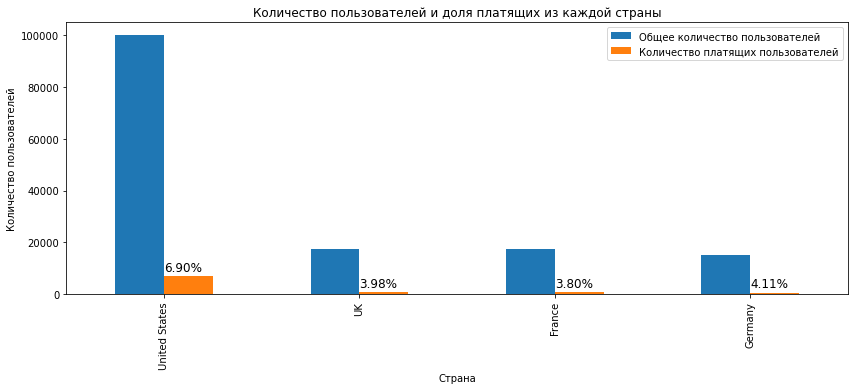

,user_id,payers,payers_perc
region,,,
United States,100002,6902,6.90%
UK,17575,700,3.98%
France,17450,663,3.80%
Germany,14981,616,4.11%


In [20]:
comparison_bar('region', 'Количество пользователей и доля платящих из каждой страны', 'Страна')

Видим, что больше всего прользователей привлечено из США, плательщиков среди них 6,9%. Остальные страны привлекают от 600 до 700 пользователей, среди которых платящие пользователи составляют примерно 4%.

Используем функцию `comparison_bar` для расчета пользователей по устройствам: 

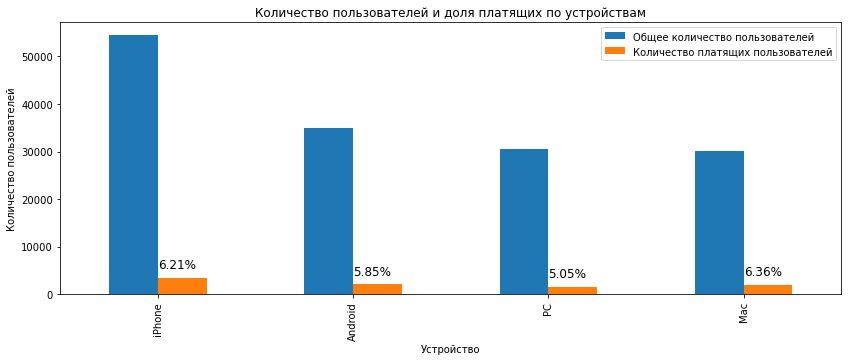

,user_id,payers,payers_perc
device,,,
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%
Mac,30042,1912,6.36%


In [21]:
comparison_bar('device', 'Количество пользователей и доля платящих по устройствам', 'Устройство')

Больше всего пользователей используют iPhone, среди них 6.21% платильщиков. У остальных устройств примерно одинаковый порядок пользователей, а плательщиков среди них от 5.05 до 6.36%.

Используем функцию `comparison_bar` для расчета пользователей по каналам привлечения: 

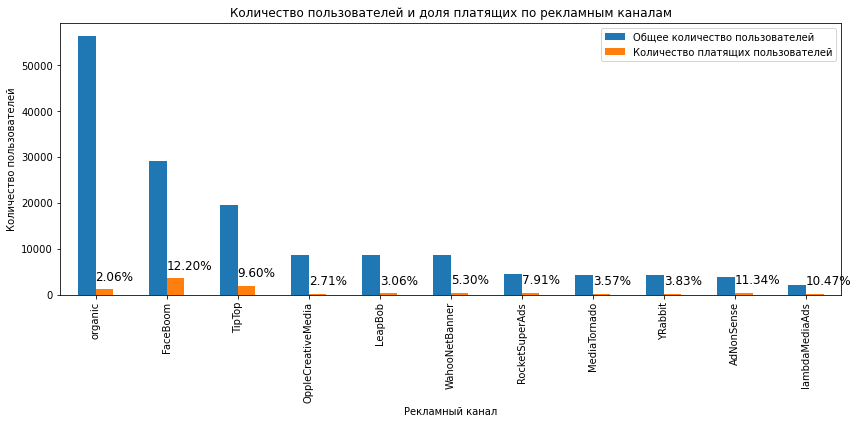

,user_id,payers,payers_perc
channel,,,
organic,56439,1160,2.06%
FaceBoom,29144,3557,12.20%
TipTop,19561,1878,9.60%
OppleCreativeMedia,8605,233,2.71%
LeapBob,8553,262,3.06%
WahooNetBanner,8553,453,5.30%
RocketSuperAds,4448,352,7.91%
MediaTornado,4364,156,3.57%
YRabbit,4312,165,3.83%


In [22]:
comparison_bar('channel', 'Количество пользователей и доля платящих по рекламным каналам', 'Рекламный канал')

Больше всего пользователей приходят в приложение органическим путем, среди них доля платильщиков составляет 2.06% (по общему числу платильшиков этот источник занимает 3 место). Больше всего платящих пользователей приносят платформы FaceBoom и TipTop, их доля от общего числа пользователей составляет 12.2% и 9.6% соотвественно. 

**Вывод**

Мы составили таблицу профилей пользователей и выяснили следующее:

* По количеству пользователей среди стран лидиует США, платящих пользователей среди них 6,9%. Остальные страны привлекают от 600 до 700 пользователей, среди которых платящие пользователи составляют примерно 4%.

* Наибольшее число пользователей используют iPhone, среди них 6.21% платильщиков. У остальных устройств примерно одинаковый порядок пользователей, а плательщиков среди них от 5.05 до 6.36%.

* Больше всего платящих пользователей приносят платформы FaceBoom и TipTop, их доля от общего числа пользователей составляет 12.2% и 9.6% соотвественно. На 3 месте по числу платильшиков - огранические пользователи (общее число пользователей значительно выше, чем у остальных каналов), доля платильщиков составляет 2.06%.

<a id="step5"></a>
## Маркетинг 

Узнаем, сколько всего денег компания потратила на привлечение пользователей:

In [23]:
print('Общая сумма расходов на маркетинг:', profiles['acquisition_cost'].sum(), 'д.е.')

Общая сумма расходов на маркетинг: 105497.29999999999 д.е.


Составим сводную таблицу, в которой посчитаем траты на привлечение клиентов для различных источников:

In [24]:
sourses_cost = profiles.pivot_table(
    index='channel',
    values='acquisition_cost',
    aggfunc='sum'
).drop(index=['organic']).sort_values(by='acquisition_cost', ascending=False)

sourses_cost['percentage'] = (sourses_cost['acquisition_cost']/sourses_cost['acquisition_cost']
                              .sum()).apply(lambda x: format(x, '.2%'))

sourses_cost


,acquisition_cost,percentage
channel,,
TipTop,54751.30,51.90%
FaceBoom,32445.60,30.75%
WahooNetBanner,5151.00,4.88%
AdNonSense,3911.25,3.71%
OppleCreativeMedia,2151.25,2.04%
RocketSuperAds,1833.00,1.74%
LeapBob,1797.60,1.70%
lambdaMediaAds,1557.60,1.48%
MediaTornado,954.48,0.90%


На основании выведенной выше таблицы построим график, на котором отобразим расходы на каждый канал привлечения, а также отобразим, какую долю от общих трат на рекламу составляет каждый канал привлечения:

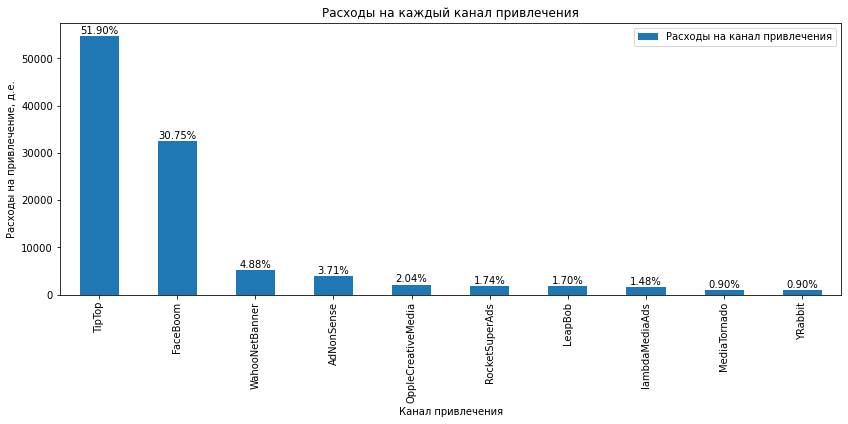

In [25]:
sourses_cost['acquisition_cost'].plot.bar(figsize=(14,5))
for i in range(len(sourses_cost['acquisition_cost'])):
    plt.text(
        x=i, 
        y=sourses_cost['acquisition_cost'][i]+500, 
        s=sourses_cost['percentage'][i], 
        ha = 'center',
        size = 10
    )
plt.legend(['Расходы на канал привлечения'])
plt.xlabel('Канал привлечения')
plt.title('Расходы на каждый канал привлечения')
plt.ylabel('Расходы на привлечение, д.е.')
plt.show();


Видим, что более 80% всего рекламного бюджета было затрачено на 2 канала привлечения - TipTop (51.9%) и FaceBoom (30.75%).

Построим 2 графика: динамику общих расходов и динамику расходов с разбивкой по каналам привлечения.

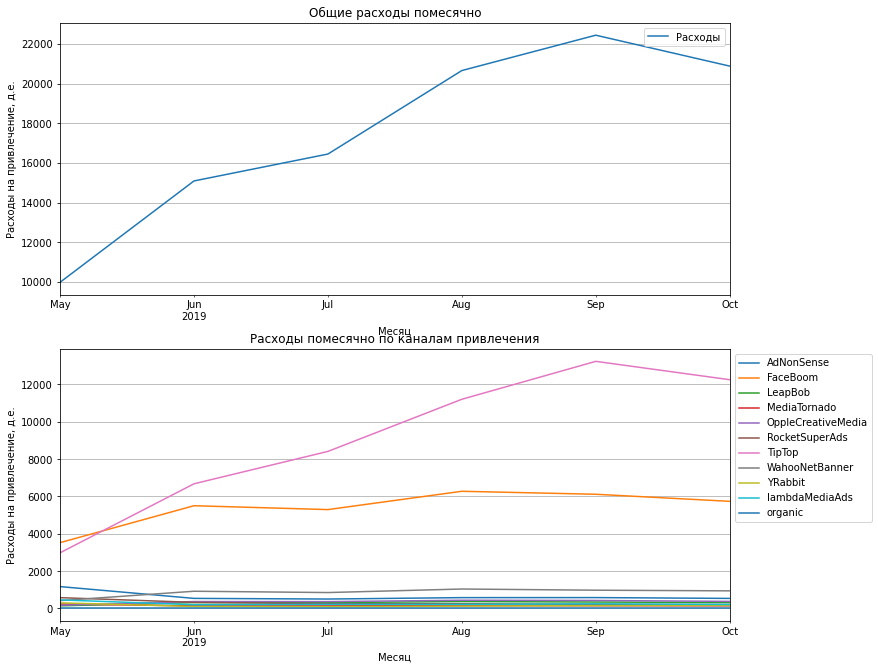

In [26]:
plt.figure(figsize=(12, 11))

profiles.pivot_table(
    index='month',
    values='acquisition_cost',
    aggfunc='sum'
).plot(grid=True, title='Общие расходы помесячно', ax=plt.subplot(2, 1, 1)).legend(bbox_to_anchor=(1.2, 0.5))
plt.legend(['Расходы'])
plt.xlabel('Месяц')
plt.ylabel('Расходы на привлечение, д.е.')

profiles.pivot_table(
    index='month',
    columns='channel',
    values='acquisition_cost',
    aggfunc='sum'
).plot(grid=True, title='Расходы помесячно по каналам привлечения', ax=plt.subplot(2, 1, 2)).legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Месяц')
plt.ylabel('Расходы на привлечение, д.е.')

plt.show()

Видим, что форма кривой для общего расхода повторяет форму кривой канала TipTop, что не удивительно: как мы раньше выяснили, половина всего рекламного бюджета пришлась на этот канал (вероятно, он оценивался как очень перспективный при распределении рекламного бюджета компании). Расходы на этот канал ежемесячно росли, за исключением последнего месяца. Также на графике можно выделить кривую расходов на канал FaceBoom, расходы которого составили практически треть всего рекламного бюджета.

Посмотрим, из каких стран привлечены пользователи по этим каналам:

In [27]:
profiles.query('channel == "TipTop" or channel == "FaceBoom"')['region'].unique()

array(['United States'], dtype=object)

Каналы TipTop и FaceBoom являются источниками привлечения пользователей из США. Запомним это на будущее.

Рассчитаем CAC для всего проекта:

In [28]:
print('Средняя стоимость привлечения 1 пользователя для всего проекта:', 
      round(profiles.query('channel != "organic"')['acquisition_cost'].mean(), 2), 'д.е.')

Средняя стоимость привлечения 1 пользователя для всего проекта: 1.13 д.е.


Посмотрим на графике, как распределена между каналами средняя стоимость привлечения одного пользователя:

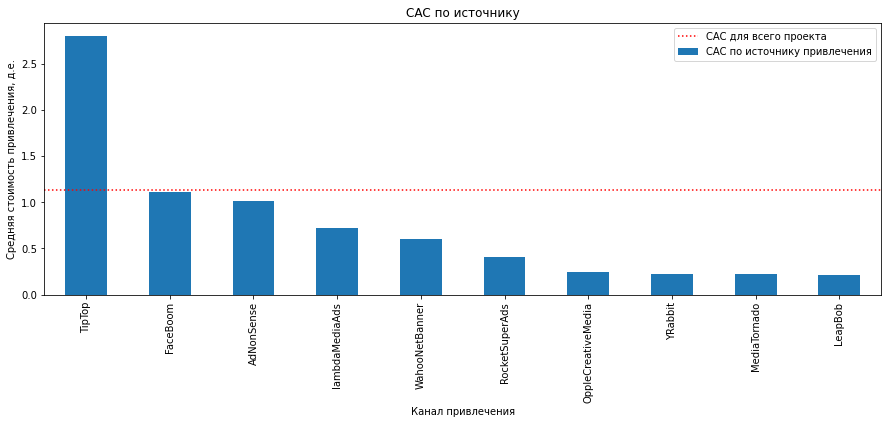

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


In [29]:
cac_by_channel = profiles.query('channel != "organic"').pivot_table(
    index='channel', 
    values='acquisition_cost', 
    aggfunc='mean'
).sort_values(by='acquisition_cost', ascending=False).round(2)

cac_by_channel.plot.bar(title='CAC по источнику', figsize=(15,5))
plt.axhline(profiles.query('channel != "organic"')['acquisition_cost'].mean(), color='red', ls='dotted')
plt.legend(['CAC для всего проекта', 'CAC по источнику привлечения'])
plt.xlabel('Канал привлечения')
plt.ylabel('Средняя стоимость привлечения, д.е.')
plt.show();

display(cac_by_channel)

Видим, что средняя стоимость привлечения для канала TipTop в 2.5 раза превышает общую среднюю стоимость привлечения. 

**Вывод**

Мы с разных сторон рассмотрели расходы компании на привлечение пользователей и выяснили следующее:

* Общая сумма расходов на маркетинг составляет 105497.3 д.е.

* Траты по источникам привлечения распределены неравномерно. Более 80% всего рекламного бюджета было затрачено на 2 канала привлечения - TipTop (51.9%) и FaceBoom (30.75%).

* Расходы на канал TipTip ежемесячно росли за исключением последнего месяца, когда они немного снизились.

* Средняя стоимость привлечения одного пользователя для всего проекта: 1.13 д.е.

* Средняя стоимость привлечения для канала TipTop превышает общую среднюю стоимость привлечения в 2.5 раза.


<a id="step6"></a>
## Oкупаемость рекламы для привлечения пользователей 

Установим момент и горизонт анализа данных. Примем, что сегодня 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

In [30]:
observation_date = datetime(2019, 11, 1).date()  
horizon_days = 14  

Поскольку мы в нашем исследовании ищем причину, по которой компания терпит убытки, несмотря на большие вложения в рекламу, для большей наглядности мы исключим из рассмотрения ключевых показателей огранических пользователей (их привлечение не стоило компании ничего, и при этом они - третьи по количеству платильщиков).

In [31]:
profiles_cut = profiles[profiles['channel'] != 'organic']

### Общая окупаемость рекламы

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции `get_ltv` и `plot_ltv_roi`: 

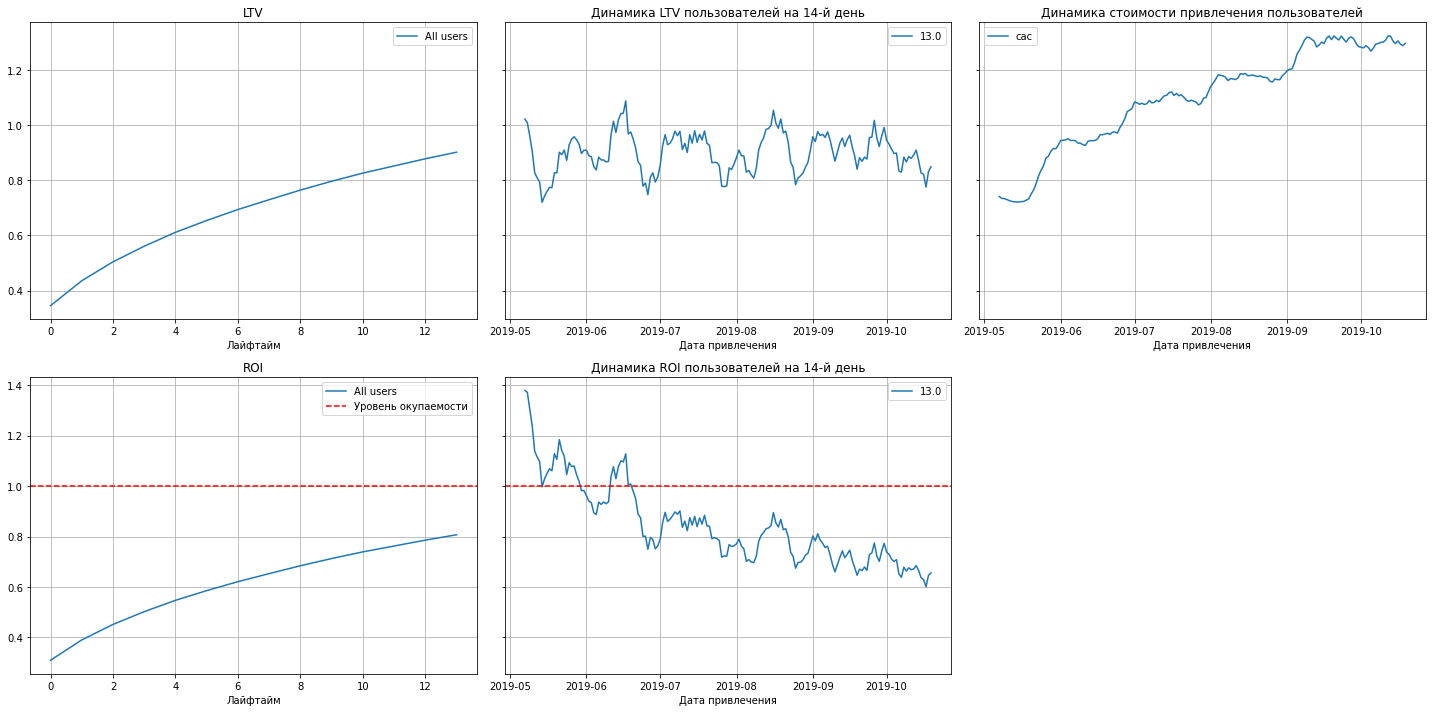

In [32]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_cut, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:
* Реклама не окупается. ROI в конце двухнедельного периода — чуть выше 80%. При этом в динамике мы видим, что примерно до середины июня окупаемость в среднем была выше 100%, а после этого падала все ниже и ниже вплоть до 70%. 
* Средняя стоимость привлечения одного пользователя со временем растет. Это может значить, что рекламный бюджет неравномерно распределен во времени, и в какие-то источники вливалось больше денег, но при этом количество новых клиентов значительно не росло. Обратим далее внимание на этот факт.
* LTV меняется во времени волнообразно: в среднем подрастает до середины месяца, а после начинает падать.


### Окупаемость рекламы с разбивкой по рекламным каналам

Пройдём по таким характеристикам пользователей, как источник привлечения клиентов, страна первого посещения и устройство пользователя.
Начнём с разбивки по каналам привлечения: передадим параметру `dimensions` столбец `channel`. Возможно, на окупаемость влияет неудачная реклама в каком-нибудь одном канале.

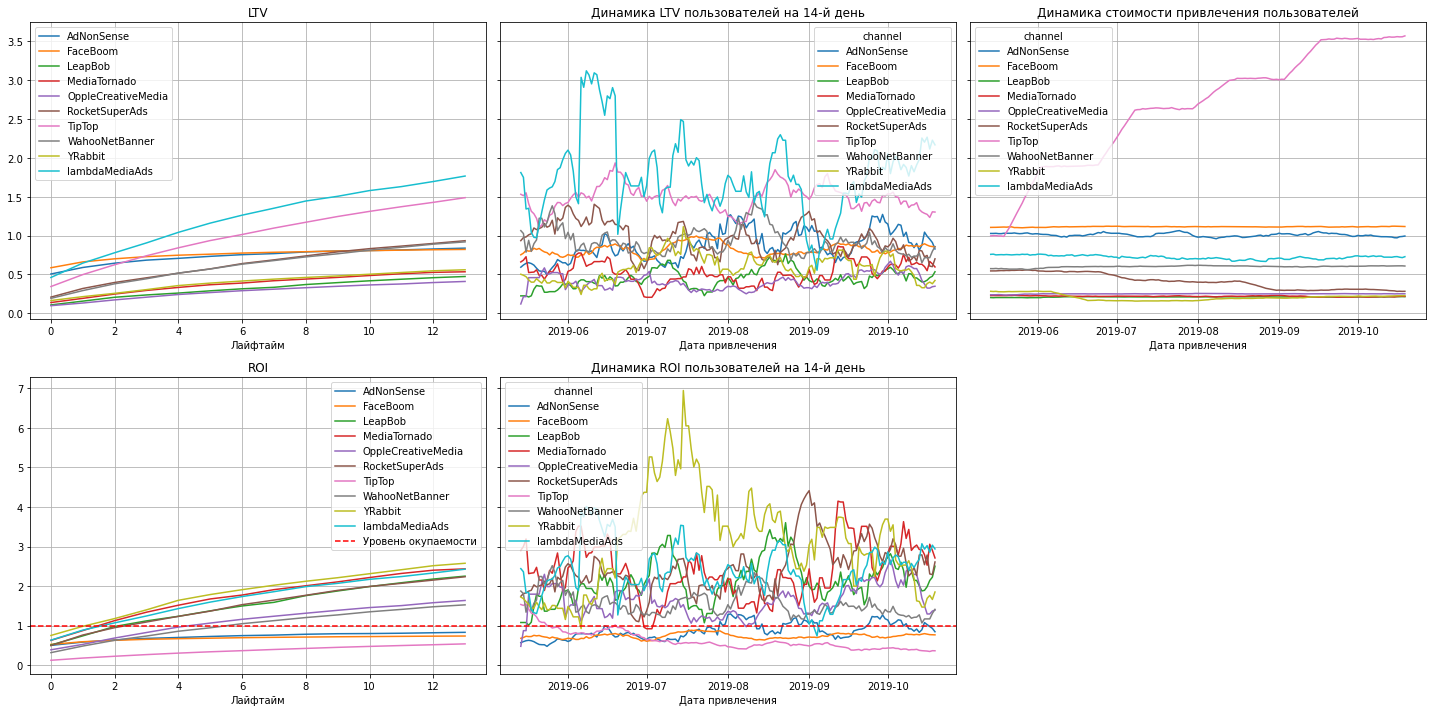

In [33]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_cut, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Сразу бросается в глаза растущий во времени показатель CAC у источника TipTop. Можем сделать вывод о том, что на этот канал привлечения на протяжении нескольких месяцев выделялись рекламные бюджеты и стоимость привлечения одного клиента возросла с 1 до 3,5 д.е. 

Лидеры по LTV - lambdaMediaAds и TipTop, они же выделяются на фоне других рекламных каналов в динамике.

Средняя окупаемость - порядка 180% для основной массы каналов привлечения. Все источники, за исключением TipTop, FaceBoom и AdNonSense, стабильно окупаются начиная с 5 дня жизни. Лидеры по окупаемости на 14 день - YRabbit, MediaTornado и lambdaMediaAds.

Уровень окупаемости TipTop, лидирующего по CAC, LTV и общему объему рекламного бюджета, на 14 день порядка 60%. 

### Окупаемость рекламы с разбивкой по странам

Рассмотрим разбивку по странам: передадим параметру `dimensions` столбец `region`:

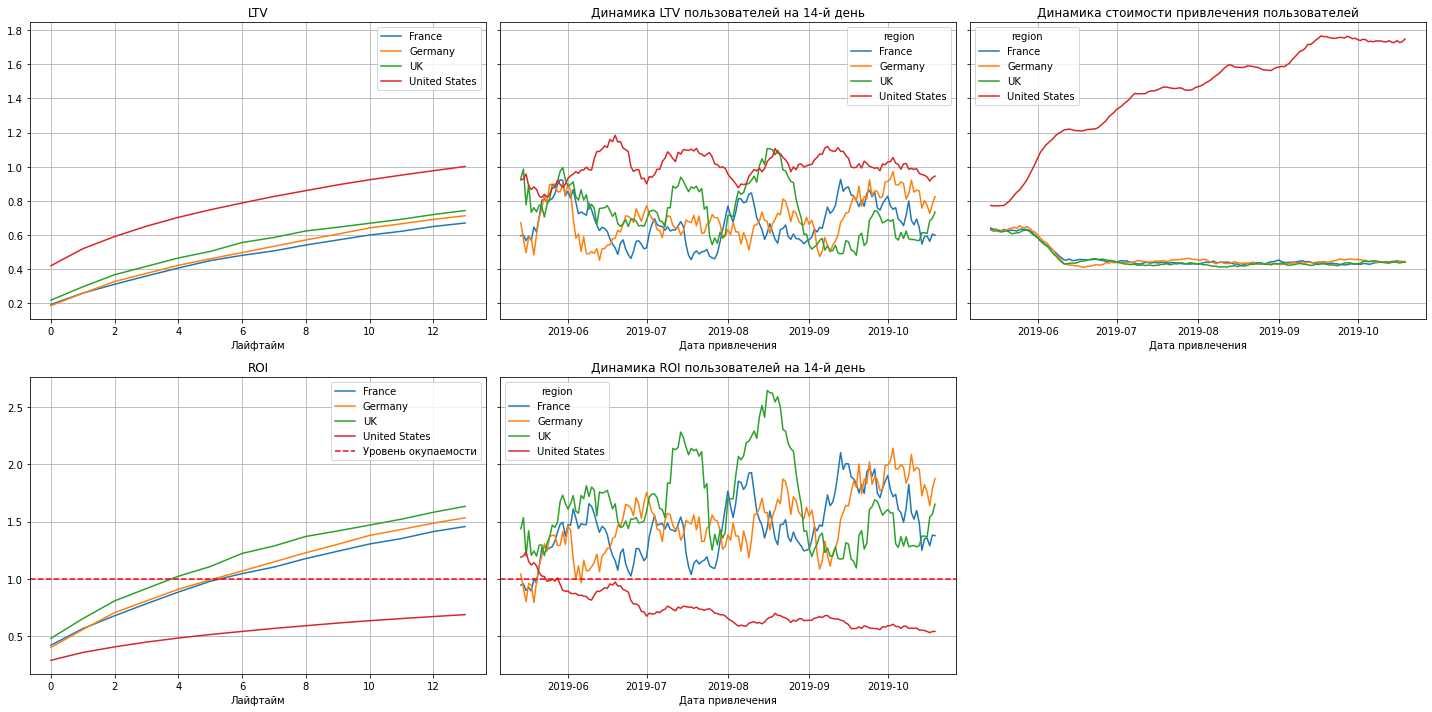

In [34]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_cut, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

В США реклама не окупается, на 14 день окупаемость составляет порядка 70%. ROI США на 14 день со временем падает (становится ниже 100% примерно с июня), в то время как у остальных стран это показатель в среднем со временем понемногу растет. Все страны, за исключением США, стабильно окупаются начиная с 5 дня жизни.

Судя по графику, самый высокий LTV — у пользователей из США (возможно, в прошлом периоде он тоже был самый высокий, поэтому было принято решение вложить в него бОльшую часть рекламного бюджета). Затем идут Великобритания и Германия. Пользователи из Франции
приносят меньше всего выручки. LTV во времени меняется волнообразно, но достаточно стабилен.
 
Стоимость привлечения для США стабильно растет. График совпадает с графиком роста CAC источника TipTop, который, как мы высянили раньше, работает на рынок США. Для других стран CAC снижается в начале и далее остается стабильной на уровне 0.4 д.е. 

### Окупаемость рекламы с разбивкой по устройствам

Рассмотрим разбивку по устройствам: передадим параметру `dimensions` столбец `device`:

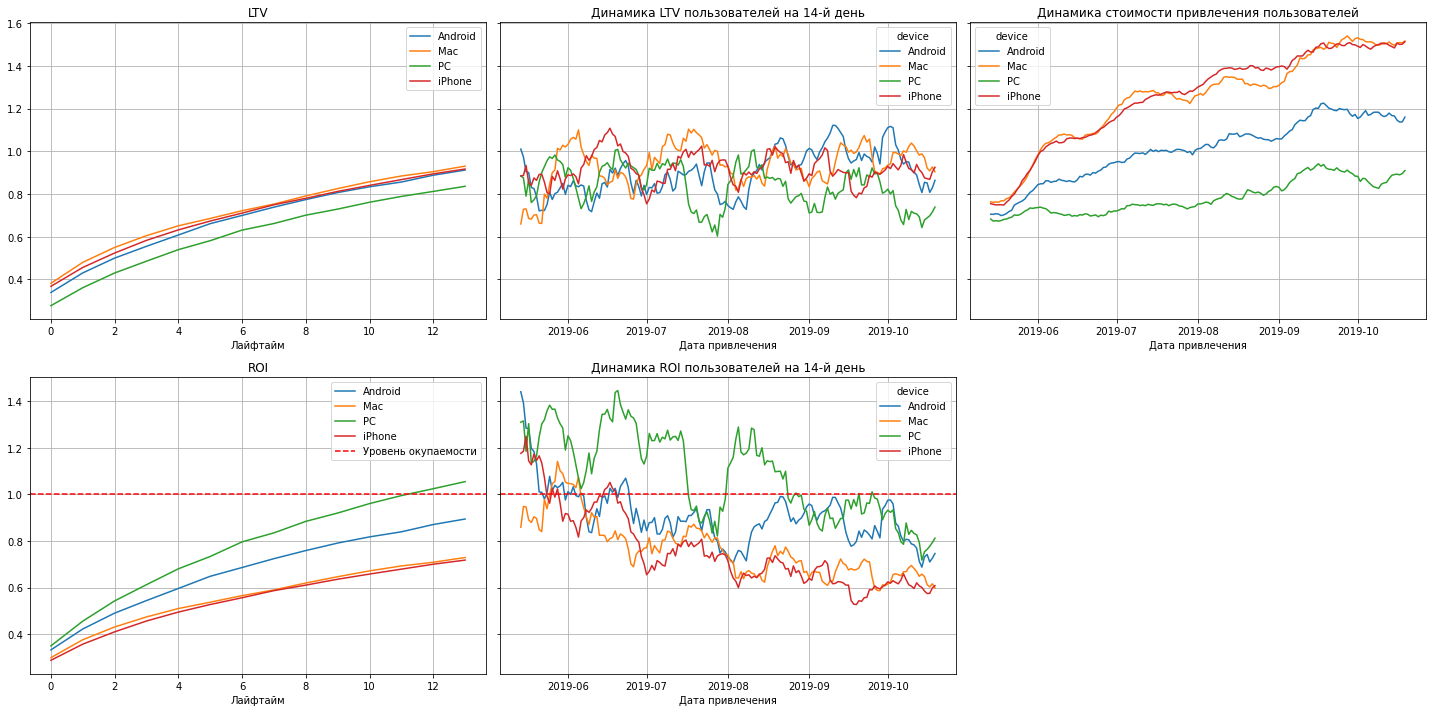

In [35]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_cut, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

У ПК пользователей более низкий LTV, чем у пользователей других устройств, а график во времени меняется волнообразно, но достаточно стабилен.

На 14 день выходит выше уровня окупаемости только ПК, остальные устройства не окупаются. На временном графике мы видим, что со временем ROI на 14 день снижается по всем устройствам, и даже показатель окупаемости ПК уходит в минус.

График CAC по форме повторяет график CAC по каналу TipTop, что вероятно указывает нам на то, что по этому каналу было привлечено большое количество пользователей всех типов устройств.

###  Конверсия и удержание с разбивкой по устройствам

Посчитаем и визуализируем конверсию, вызвав функции `get_conversion` и `plot_conversion`. Для начала посмотрим конверсию с разбивкой по устройствам:

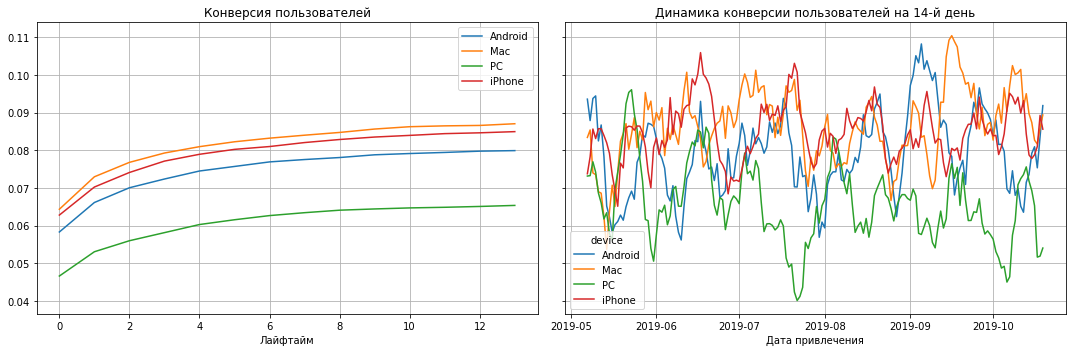

In [36]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_cut, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи Mac, iPhone и Andriod конвертируются стабильно хорошо. Конверсия ПК ниже, чем у остальных устройств (возможно, у пользователей возникает какая-то проблема при оплате первой покупки). Вызовем функции get_retention() и plot_retention(), чтобы отразить удержание:

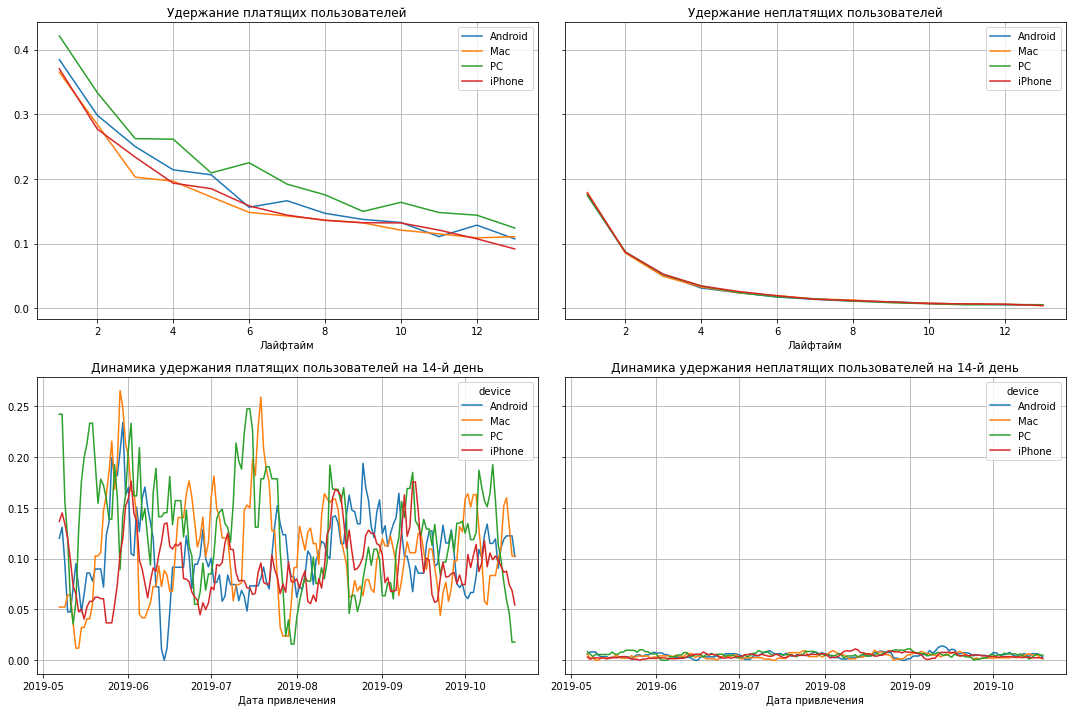

In [37]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_cut, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Коэффициент удержания для платящих пользователей по устройствам схожий, наилучшие показатели по удержанию у ПК. В динамике удержание на 14 день сильно меняется и в среднеем составляет порядка 10%.

Удержание неплатящих пользователей примерно одинаково для всех устройств.

###  Конверсия и удержание с разбивкой по странам

Посмотрим на конверсию с разбивкой по странам:

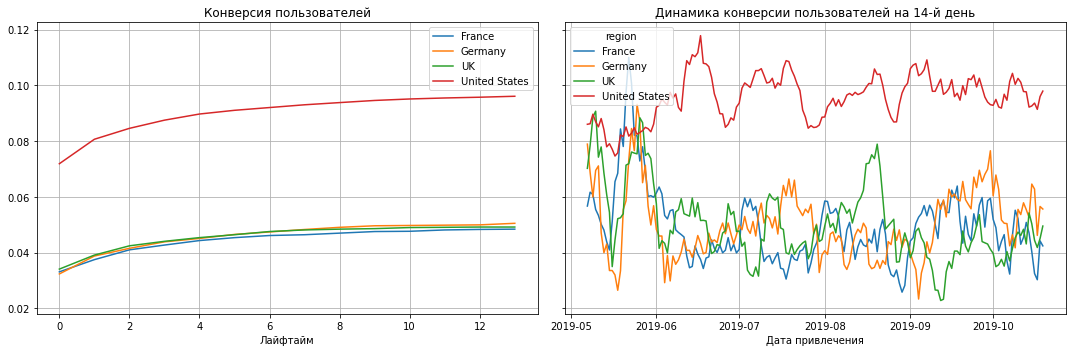

In [38]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_cut, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Явно выделяется среди других кривая конверсии США. На протяжении всего периода она в среднем в 2 раза больше, чем у других стран. В динамике видим скачок показателя конверсии в конце мая у Франции, Германии и Великобритании, и затем заметное снижение. 

Посмотрим показатели удержания по странам:

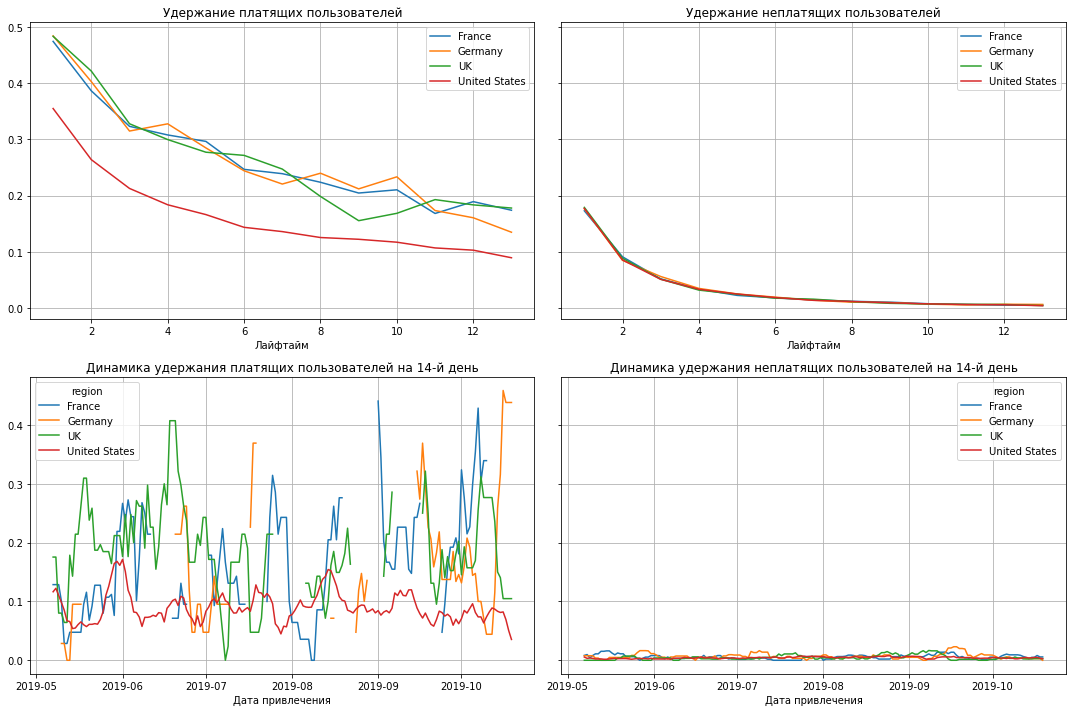

In [39]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_cut, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Видим, что удержание платящих пользователей из США значительно ниже, чем для других стран. Это говорит нам о том, что пользователи из США активнее остальных делают покупки в первый день, но "хуже" доживают до периода окупаемости. При этом мы помним, что LTV у пользователей из США самый большой. Вероятно, имеет место привлечение большого количества пользователей, среди которых не так много тех, кто действительно заинтересован в продукте.

###  Конверсия и удержание с разбивкой по рекламным каналам

Наконец, посмотрим данные по конверсии с разбивкой по рекламным каналам:

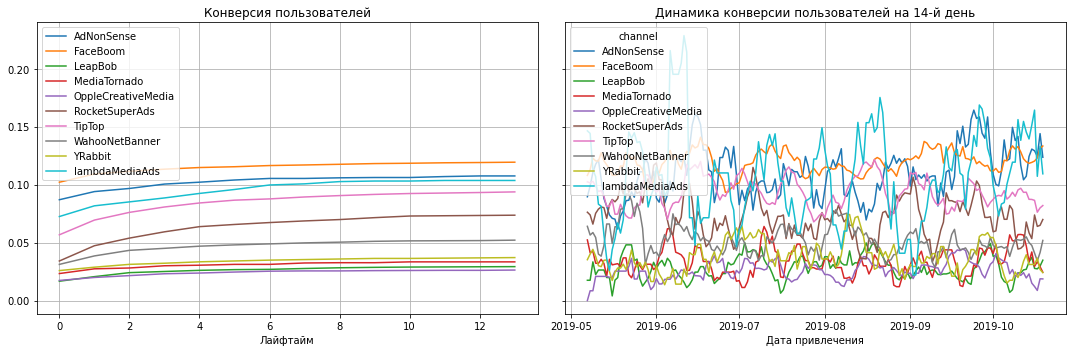

In [40]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_cut, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По показателю конверсии среди всех источников выделяются более высокими значениями каналы FaceBoom, AdNonSense, lambdaMediaAds и TipTop. 

Рассмотрим удержание с разбивкой по рекламным источникам:

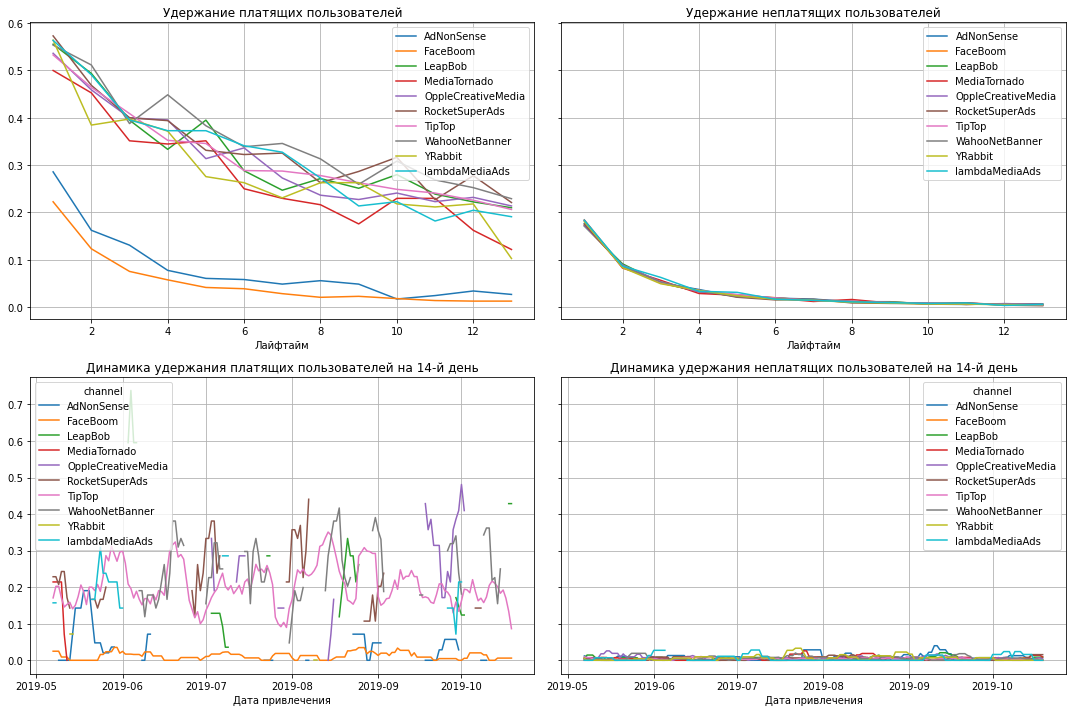

In [41]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_cut, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание по источникам FaceBoom и AdNonSense выделяются среди остальных значительно более низкими показателями удержания. Можно предположить, что в работе с некоторыми каналами выбрана неправильная коммуникация или неподходящая настройка целевой аудитории, в результате чего рекламная компания привлекает не тех пользователей.

**Вывод**

В результате исследования мы можем сделать вывод о том, что реклама, направленная на привлечение пользователей, в целом не окупается.

Рекламные каналы TipTop и FaceBoom несмотря на большие бюджеты не привлекают достаточного количества пользователей. Как мы выяснили ранее, оба этих канала привлекают пользователей из США, поэтому графики окупаемости, конверсии и удержания США повторяет динамику графиков каналов TipTop и FaceBoom. Очевидно, оба этих канала оказывают негативное влияние на общую окупаемость рекламы.

Также мы видим, что несмотря на высокие показатели конверсии у каналов FaceBoom и AdNonSense, они же показывают гораздо более низкое удержание пользователей по сравнению с остальными каналами. Это говорит нам о том, что пользователи активно делают покупки в первый день, но "хуже" доживают до периода окупаемости.

Возмжно, имеет смысл перенаправить рекламный бюджет на другие рекламные каналы. Например, хорошо себя показал рекламный канал lambdaMediaAds: у него отличные показатели LTV, окупаемости и конверсии.

Среди устройств можно выделить пользователей ПК: по сравнению с другими устройствами только ПК выходит выше уровня окупаемости. Эти пользователи лучше всех удерживаются, но при этом конверсия у них ниже, чем у других устройств. Возможно, техническая доработка поможет повысить конверсию этих пользователей.


<a id="step7"></a>
## Общий вывод 

Мы провели маркетинговое исследование приложения Procrastinate Pro+ во временном периоде с 2019-05-01 по 2019-10-27. В нашем распоряжении были данные о  логах посещений пользователей и заказах, их устройствах, странах и источниках привлечения, а также о затратах на каждый источник привлечения. Перед нами стояла задача выявления причин неэффективного привлечения пользователей.

Наше исследование состяло из нескольких этапов:

1. По количеству пользователей лидиует США, платящих пользователей среди них 6,9%. Остальные страны привлекают от 600 до 700 пользователей, среди которых платящие пользователи составляют примерно 4%. Наибольшее число пользователей используют iPhone, среди них 6.21% платильщиков. У остальных устройств примерно одинаковый порядок пользователей, а плательщиков среди них от 5.05 до 6.36%. Больше всего платящих пользователей приносят платформы FaceBoom и TipTop, их доля от общего числа пользователей составляет 12.2% и 9.6% соотвественно. На 3 месте по числу платильшиков - огранические пользователи (общее число пользователей значительно выше, чем у остальных каналов), доля платильщиков составляет 2.06%.


2. Общая сумма расходов на маркетинг составляет 105 497.30 д.е. Траты по источникам привлечения распределены неравномерно. Более 80% всего рекламного бюджета было затрачено на 2 канала привлечения - TipTop (51.9%) и FaceBoom (30.75%). Средняя стоимость привлечения одного пользователя для всего проекта: 1.13 д.е. Средняя стоимость привлечения для канала TipTop превышает общую среднюю стоимость привлечения в 2.5 раза.


3. По результатам рассмотрения показателей окупаемости можно сделать вывод о том, что реклама, направленная на привлечение пользователей, в целом не окупается. 
* Рекламные каналы TipTop и FaceBoom несмотря на большие бюджеты не привлекают достаточного количества пользователей. Оба этих канала привлекают пользователей из США, поэтому графики окупаемости, конверсии и удержания США повторяет динамику графиков каналов TipTop и FaceBoom. Очевидно, оба этих канала оказывают негативное влияние на общую окупаемость рекламы. Несмотря на высокие показатели конверсии у каналов FaceBoom и AdNonSense, они же показывают гораздо более низкое удержание пользователей по сравнению с остальными каналами. Это говорит нам о том, что пользователи активно делают покупки в первый день, но "хуже" доживают до периода окупаемости. 
* Среди устройств можно выделить пользователей ПК: по сравнению с другими устройствами только ПК выходит выше уровня окупаемости. Эти пользователи лучше всех удерживаются, но при этом конверсия у них ниже, чем у других устройств. 

*Рекомендации для отдела маркетинга:*

* Рекомендуется снизить рекламные бюджеты каналов TipTop и FaceBoom, и перенаправить рекламный бюджет на другие рекламные каналы. Например, хорошо себя показал рекламный канал lambdaMediaAds: у него отличные показатели LTV, окупаемости и конверсии. Также рекомендуется более пристально отнестись к "портрету" привлекаемых пользователей, т.к. есть вероятность, что ранее через рекламные каналы были привлечены пользователи, не заинтересованные в продукте.

* Рекомендуется технически доработать приложение для пользователей ПК (проверить, корректно ли работает механизм оплаты), что возможно поможет повысить конверсию этих пользователей.